# <font color='blue'>**Recurrent Neural Networks (RNNs)**</font>

#### **RNN**
#### **Long Short Term Memory (LSTM)**
#### **Gated Recurrent Unit (GRU)**
#### **Application to Time Series**
#### **Applicatioin to Text**

---
### <font color='grey'>**Waqar Hassan**</font>

---

## <font color='blue'>Biblography </font>


**References**
- [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/)

- [Understanding LSTMs Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

- [Vanishing and Exploding Gradients Problems in Deep Learning](https://www.geeksforgeeks.org/vanishing-and-exploding-gradients-problems-in-deep-learning/)

- [Deeplearning.ai](https://www.deeplearning.ai/courses/deep-learning-specialization/)


**Videos**

- [https://www.youtube.com/watch?v=yCC09vCHzF8&t=311s&ab_channel=AndrejKarpathy](https://www.youtube.com/watch?v=yCC09vCHzF8&t=311s&ab_channel=AndrejKarpathy)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/Seminar_RNN/images/'   # colab

image_path = './images/'   # local drive


## <font color='blue'>**Sequence data** </font>
RNNs are sequential models that are designed to work with sequences of data.

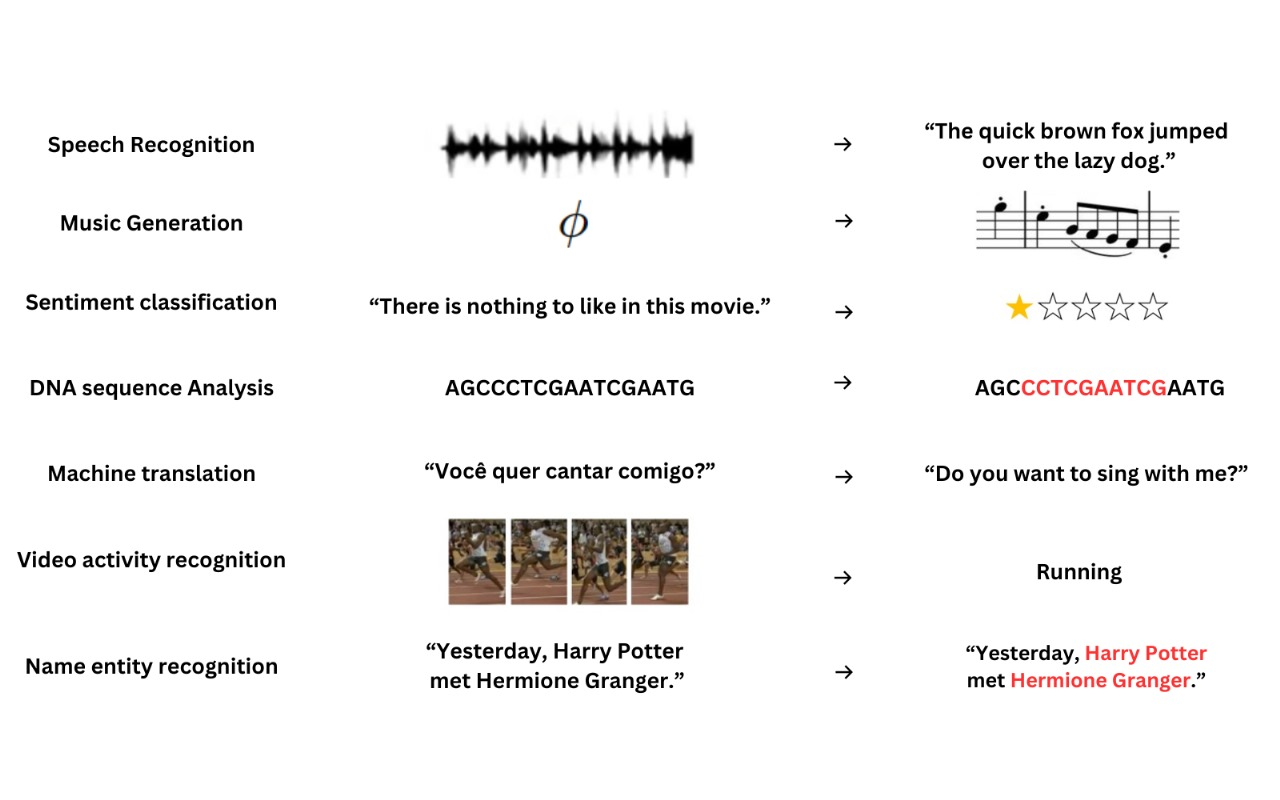

In [2]:
# @title
from IPython.display import Image, display

# Display the image
# display(Image(filename='/content/drive/MyDrive/Post_doc_work/Seminar_RNN/images/Sequence_data_examples.jpeg'))
display(Image(filename= image_path + 'Examples_sequence_data.jpeg'))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'>Example of Sequence data</p>"))

## <font color='blue'>**Applications**</font>

 They are particularly suited for tasks where the order of the data is important, making them useful for a variety of applications:

### 1. **Natural Language Processing (NLP)**
   - <font color='blue'>**Text Generation:**</font> Creating coherent and contextually relevant text based on a given prompt. Example: GPT models.
   - <font color='blue'>**Machine Translation:**</font> Translating text from one language to another. Example: Google Translate.
   - <font color='blue'>**Sentiment Analysis:**</font> Determining the sentiment expressed in a piece of text, such as positive, negative, or neutral.
   - <font color='blue'>**Speech Recognition:**</font> Converting spoken language into text. Example: Voice assistants like Siri or Google Assistant.
   - <font color='blue'>**Named Entity Recognition (NER):**</font> Identifying entities like names, dates, and locations within text.

### 2. **Time Series Forecasting**
   - <font color='blue'>**Financial Forecasting:**</font> Predicting stock prices, currency exchange rates, or other financial metrics based on historical data.
   - <font color='blue'>**Weather Prediction:**</font> Forecasting weather conditions like temperature or precipitation using historical weather data.

### 3. **Speech and Audio Processing**
   - <font color='blue'>**Speech Synthesis:**</font> Generating human-like speech from text. Example: Text-to-speech.
   - <font color='blue'>**Audio Classification:**</font> Identifying and classifying sounds or musical genres from audio recordings.

### 4. **Video Analysis**
   - <font color='blue'>**Action Recognition:**</font> Identifying and categorizing actions in a video sequence. Example: Recognizing different types of physical activities.
   - <font color='blue'>**Video Captioning:**</font> Generating descriptive captions for video content.

### 5. **Sequential Data Prediction**
   - <font color='blue'>**Next-Word Prediction:**</font> Predicting the next word in a sentence based on the previous words. Example: Autocomplete features in text editors.

### 9. **Music Generation**
   - <font color='blue'>**Composing Music:**</font> Generating music sequences based on learned patterns from existing compositions.

<!-- RNNs are versatile and can be adapted for various sequential and temporal tasks. However, they also have limitations, such as difficulty in learning long-term dependencies due to vanishing and exploding gradient problems. Advanced variations like Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs) address some of these limitations and are widely used in practice. -->

**NOTE:** *Some examples have same length of sequence in input and output while some do not have. E.g. DNA seq and Name entity has same seq len in input and output.*


## <font color='blue'>**Types of RNNs**</font>

It refer to different ways data is processed through the architecture, such as:

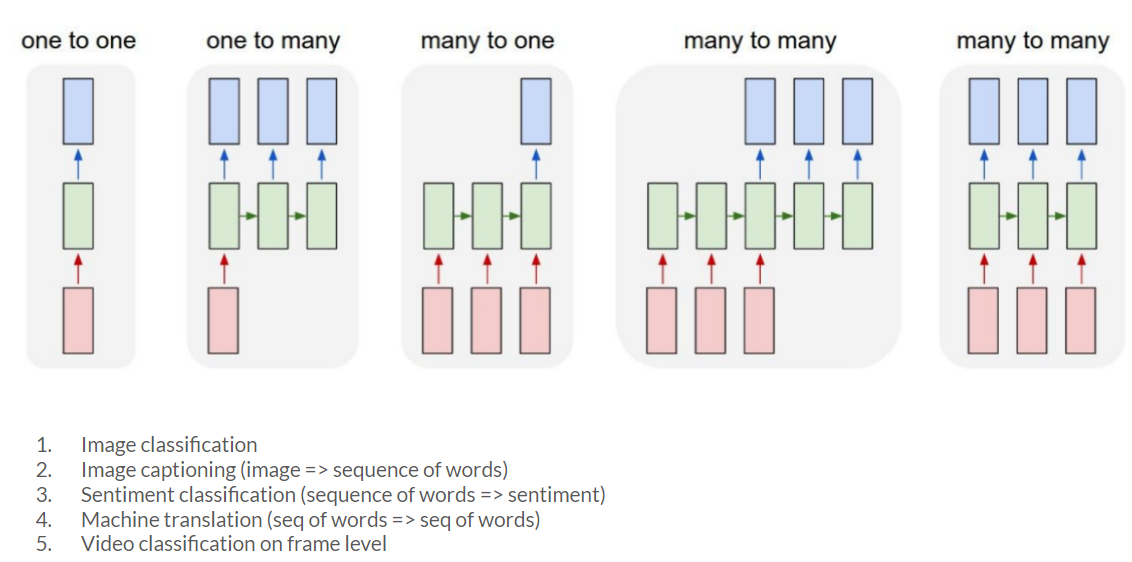

In [3]:
# @title
from IPython.display import Image, display

# Display the image
display(Image(filename= image_path+'RNN_Architecture_or_types.png'))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'>Types of RNNs</p>"))

## <font color='blue'>**RNN Architecture**</font>

**Structure:** RNNs have a unique architecture that includes loops in their structure, allowing information to continue across different time steps. They maintain a hidden state that captures information from previous inputs.


**Operation:** RNNs process sequential data by taking one input at a time, updating their hidden state, and making predictions based on the current input and the previous hidden state.

**Hidden States:**
It refer to the internal states of the model that store information about previous inputs in a sequence. They are a crucial part of how RNNs (and their variants like LSTMs and GRUs) maintain a "memory" of past information when processing sequential data.

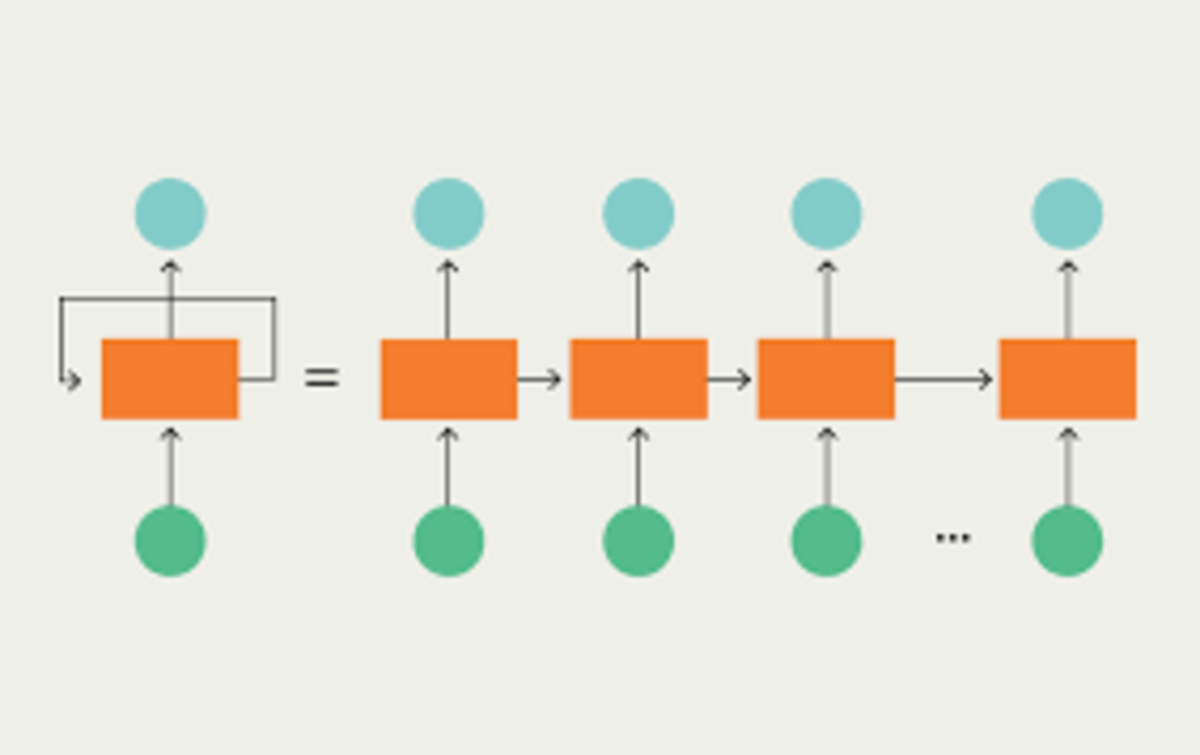

In [4]:
# @title
from IPython.display import Image, display

# Display the image
display(Image(filename= image_path+'RNN_repetitive.png', width=700, height=400))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'></p>"))





### <font color='blue'>Equation</font>

$$\mathbf{a}^{\langle t \rangle} = \mathbf{f}_W(\mathbf{x}^{\langle t \rangle}, \mathbf{a}^{\langle t-1 \rangle}) $$

$$
\downarrow
$$


$$\mathbf{a}^{\langle t \rangle} = \mathbf{tanh}(W_{ax}\mathbf{x}^{\langle t \rangle} + W_{aa}\mathbf{a}^{\langle t-1 \rangle} + b_a) $$


$$\mathbf{y}^{\langle t \rangle} = \mathbf{Softmax}(W_{ya}\mathbf{a}^{\langle t \rangle} + b_y) $$



**An RNN has 3 steps:**

<font color='blue'>Input</font>
- Take in a sequence item, and multiply it by the input weight.

<font color='blue'>Hidden</font>
- Take the previous hidden state, and multiply it by the hidden weight. Add in the input, then apply a nonlinear activation function.

<font color='blue'>Output</font>
- Take the hidden state, and multiply by the output weight.

## <font color='blue'>**Implementation of RNN from Scratch**</font>


<a name='1'></a>
### Forward Propagation for the Basic Recurrent Neural Network

The basic RNN we will implement has the following structure:

In this example, $T_x = T_y$.

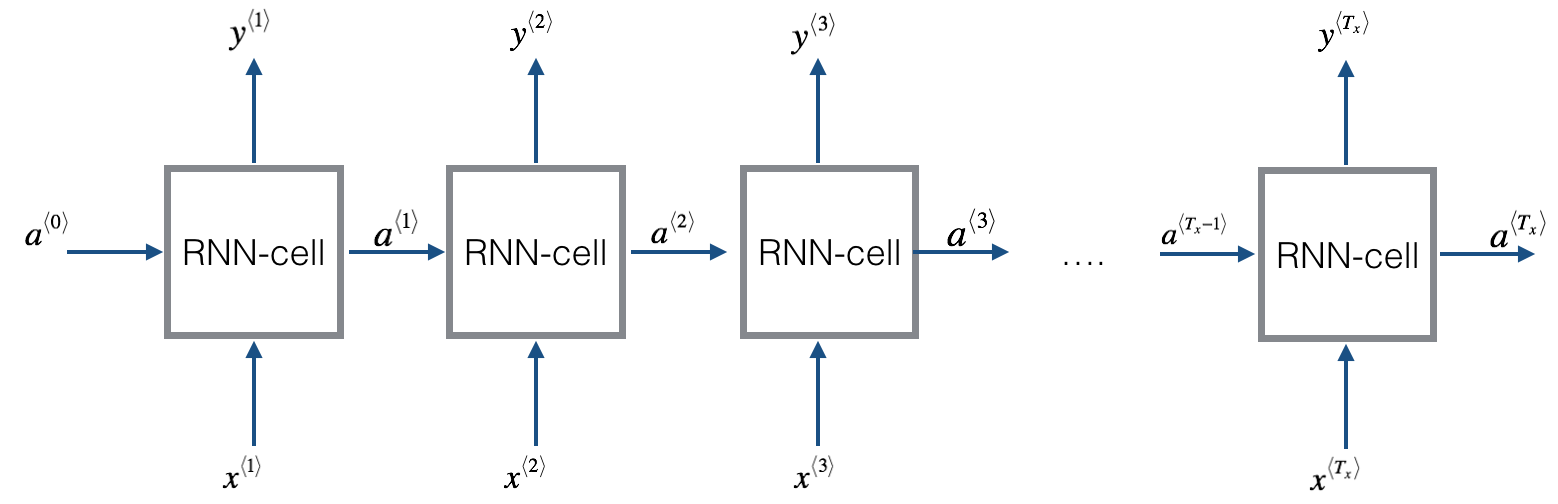

In [5]:
# @title
from IPython.display import Image, display

# Display the image
display(Image(filename= image_path +'RNN.png'))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'>Basic RNN model</p>"))


**Steps**:
1. Implement the calculations needed for one time step of the RNN.
2. Implement a loop over $T_x$ time steps in order to process all the inputs, one at a time.

The following figure describes the operations for a single time step of an RNN cell:


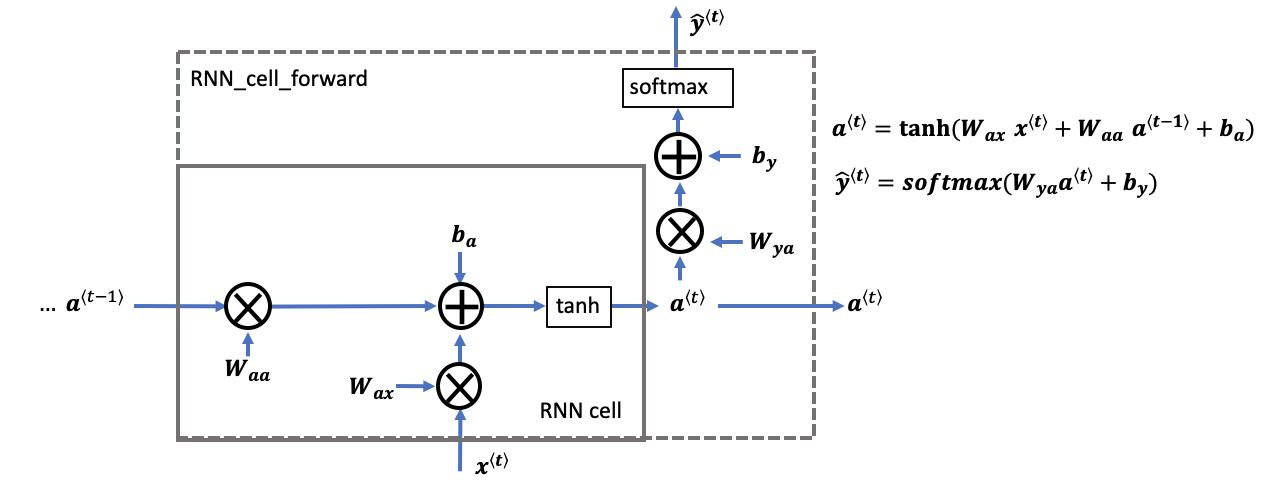

In [6]:
# @title
from IPython.display import Image, display

# Display the image
display(Image(filename= image_path+'rnn_step_forward_figure2_v3a.png'))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'>Basic RNN cell</p>"))


### <font color='blue'>Implementation </font>

In [7]:
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell.
                                                                          # n_x is the number of units in a single time step of a single training example.
    Arguments:                                                            # m is the mini-batch size m denotes number of training examples.
    xt -- input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """

    # Retrieve parameters from "parameters"
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    # compute next hidden state using the formula
    a_next = np.tanh( np.dot(Waa , a_prev) + np.dot(Wax , xt) + ba)

    # compute output of the current cell using the formula
    yt_pred = softmax(np.dot(Wya , a_next) + by )

    # store values you need for backward propagation in cache
    cache = (a_next, a_prev, xt, parameters)

    return a_next, yt_pred, cache

<a name='1-2'></a>
### <font color='blue'>RNN Forward Pass </font>

- A recurrent neural network (RNN) is a repetition of the RNN cell.
    - If your input sequence of data is 10 time steps long, then you will re-use the RNN cell 10 times
- Each cell takes two inputs at each time step:
    - $a^{\langle t-1 \rangle}$: The hidden state from the previous cell
    - $x^{\langle t \rangle}$: The current time step's input data
- It has two outputs at each time step:
    - A hidden state ($a^{\langle t \rangle}$)
    - A prediction ($y^{\langle t \rangle}$)
- The weights and biases $(W_{aa}, b_{a}, W_{ax}, b_{x})$ are re-used each time step
    - They are maintained between calls to `rnn_cell_forward` in the 'parameters' dictionary

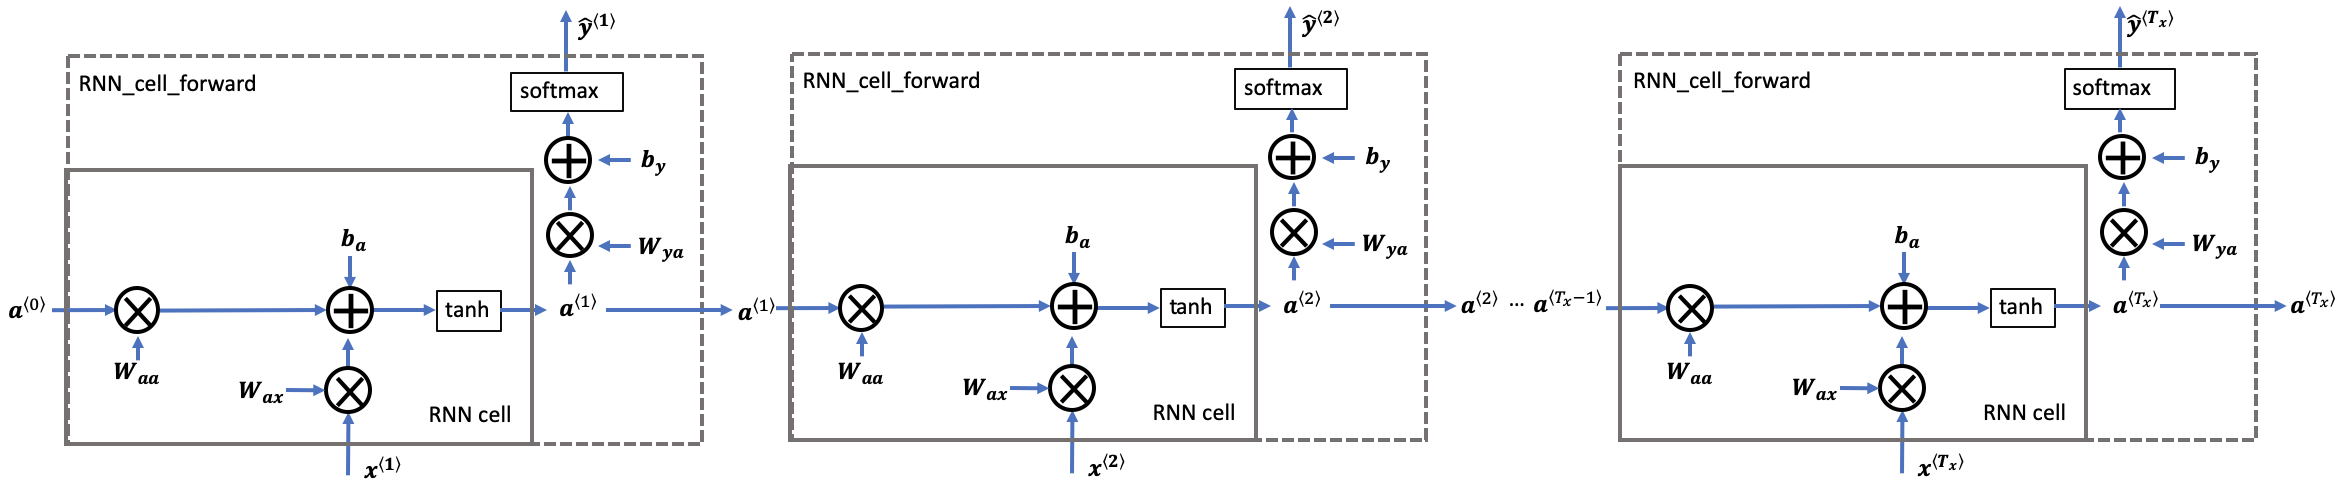

In [9]:
# @title
from IPython.display import Image, display

# Display the image
display(Image(filename=image_path+'rnn_forward_sequence_figure3_v3a.png'))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'>RNN forward pass</p>"))


In [10]:
# rnn_forward

def rnn_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network.

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """

    # Initialize "caches" which will contain the list of all caches
    caches = []

    # Retrieve dimensions from shapes of x and parameters["Wya"]
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape


    # initialize "a" and "y_pred" with zeros
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))

    # Initialize a_next
    a_next = a0

    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache
        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)
        # Save the value of the new "next" hidden state in a
        a[:,:,t] = a_next
        # Save the value of the prediction in y
        y_pred[:,:,t] = yt_pred
        # Append "cache" to "caches"
        caches.append(cache)

    # store values needed for backward propagation in cache
    caches = (caches, x)

    return a, y_pred, caches

In [11]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 4)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5, 5)
parameters_tmp['Wax'] = np.random.randn(5, 3)
parameters_tmp['Wya'] = np.random.randn(2, 5)
parameters_tmp['ba'] = np.random.randn(5, 1)
parameters_tmp['by'] = np.random.randn(2, 1)

a_tmp, y_pred_tmp, caches_tmp = rnn_forward(x_tmp, a0_tmp, parameters_tmp)
# print("a[4][1] = \n", a_tmp[4][1])
# print("a.shape = \n", a_tmp.shape)
print("y_pred[1][3] =\n", y_pred_tmp[1][3])
print("y_pred.shape = \n", y_pred_tmp.shape)

y_pred[1][3] =
 [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape = 
 (2, 10, 4)


In [12]:
np.sum(y_pred_tmp[:,1,2])

1.0

## <font color='blue'>**Backpropagation through time (BPTT)**</font>

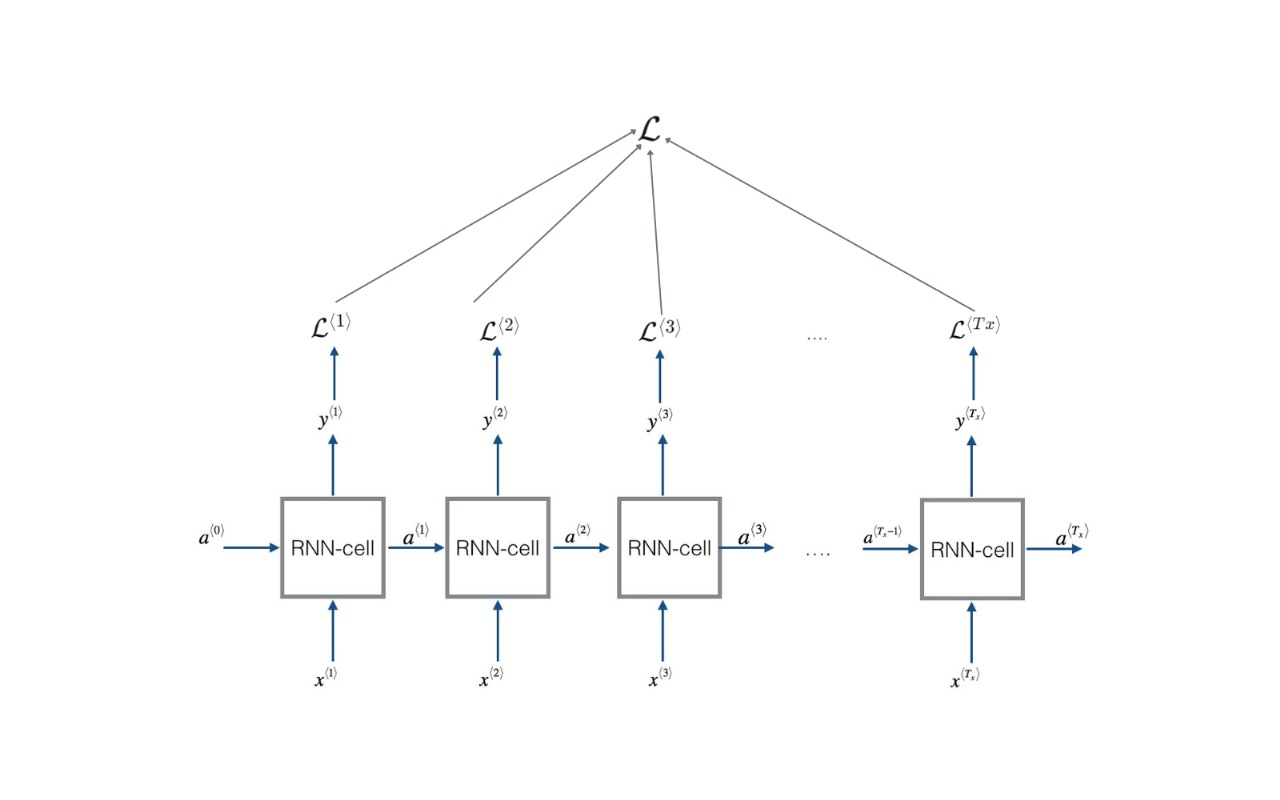

In [13]:
# @title
from IPython.display import Image, display

# Display the image
display(Image(filename=image_path+'Forward_backword_propagation.jpeg'))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'>RNN's Forward & Backword propagation</p>"))


- Gradients are computed for each time step and propagated backward in time through the sequence.
  - Gradient of the loss with respect to the hidden state
  - Gradients of the loss with respect to the weights

- Means that the gradient at each time step depends not only on the current time step but also on previous time steps due to the recurrent connections.

- Update parameters

## <font color='blue'>**Problem of Long term dependencies**</font>


Sometimes, we only need to look at recent information to perform the present task.
- Trying to predict the next word based on the previous ones.
  - **The clouds are in the <font color = 'red'><u>sky**</font></u> 
  
  we don’t need any further context – it’s pretty obvious the next word is going to be sky.
  - The cases where the gap between the relevant information and the place that it’s needed is small, RNNs can learn to use the past information.

But there are also cases where we need more context.

- Consider trying to predict the last word in the text 
  - **I grew up in Pakistan, … , I speak fluent <font color = 'red'><u>Urdu**</font></u> 
  
  Recent information suggests that the next word is probably the name of a language, but if we want to narrow down which language, we need the context of Pakistan, from further back.

Unfortunately, as that gap grows, RNNs become unable to learn to connect the information because of Vanishing gradient problem.

**LSTM** & **GRU** are explicitly designed to avoid the long-term dependency problem.

# <font color='blue'>**Long Short Term Memory networks (LSTM)**</font>

#### Remembering information for long periods of time

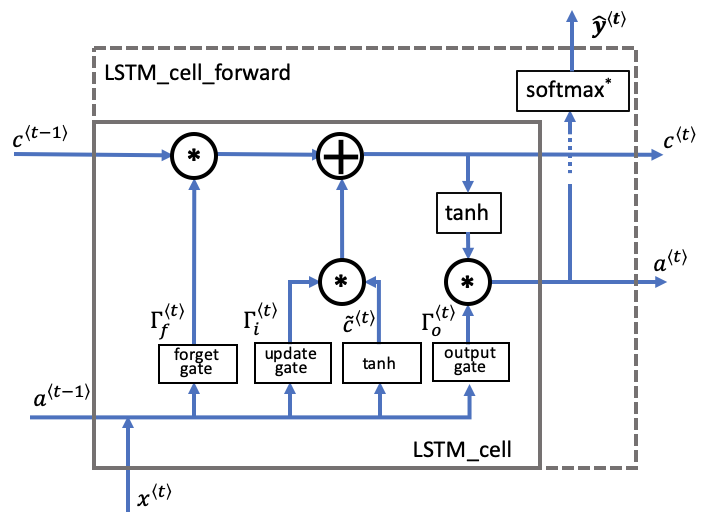

In [14]:
# @title
from IPython.display import Image, display

# Display the image
display(Image(filename= image_path+'LSTM_figure4_v3a.png'))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'>LSTM cell</p>"))


The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

An LSTM has three gates to protect and control the cell state.

### <font color='blue'>Overview of gates and states</font>



#### <font color='grey'>**Forget gate $\mathbf{\Gamma}_{f}$**</font>

* The first step in LSTM is to decide what information we’re going to throw away from the cell state.

* Let's assume you are reading words in a piece of text, and plan to use an LSTM to keep track of grammatical structures, such as whether the subject is singular ("puppy") or plural ("puppies").
* If the subject changes its state (from a singular word to a plural word), the memory of the previous state becomes outdated, so you'll "forget" that outdated state.
* The "forget gate" is a tensor containing values between 0 and 1.
    * If a unit in the forget gate has a value close to 0, the LSTM will "forget" the stored state in the corresponding unit of the previous cell state.
    * If a unit in the forget gate has a value close to 1, the LSTM will mostly remember the corresponding value in the stored state.

##### Equation

$$\mathbf{\Gamma}_f^{\langle t \rangle} = \sigma(\mathbf{W}_f[\mathbf{a}^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_f)\tag{1} $$


* $\mathbf{W_{f}}$ contains weights that govern the forget gate's behavior.
* The previous time step's hidden state $[a^{\langle t-1 \rangle}$ and current time step's input $x^{\langle t \rangle}]$ are concatenated together and multiplied by $\mathbf{W_{f}}$.
* A sigmoid function is used to make each of the gate tensor's values $\mathbf{\Gamma}_f^{\langle t \rangle}$ range from 0 to 1.
* The forget gate  $\mathbf{\Gamma}_f^{\langle t \rangle}$ has the same dimensions as the previous cell state $c^{\langle t-1 \rangle}$.
* This means that the two can be multiplied together, element-wise.
* Multiplying the tensors $\mathbf{\Gamma}_f^{\langle t \rangle} * \mathbf{c}^{\langle t-1 \rangle}$ is like applying a mask over the previous cell state.
* If a single value in $\mathbf{\Gamma}_f^{\langle t \rangle}$ is 0 or close to 0, then the product is close to 0.
    * This keeps the information stored in the corresponding unit in $\mathbf{c}^{\langle t-1 \rangle}$ from being remembered for the next time step.
* Similarly, if one value is close to 1, the product is close to the original value in the previous cell state.
    * The LSTM will keep the information from the corresponding unit of $\mathbf{c}^{\langle t-1 \rangle}$, to be used in the next time step.
    
<!-- ##### Variable names in the code
The variable names in the code are similar to the equations, with slight differences.  
* `Wf`: forget gate weight $\mathbf{W}_{f}$
* `bf`: forget gate bias $\mathbf{b}_{f}$
* `ft`: forget gate $\Gamma_f^{\langle t \rangle}$ -->

#### <font color='grey'>**Candidate value $\tilde{\mathbf{c}}^{\langle t \rangle}$**</font>

* The next step is to decide what new information we’re going to store in the cell state.
* The candidate value is a tensor containing information from the current time step that **may** be stored in the current cell state $\mathbf{c}^{\langle t \rangle}$.
* The parts of the candidate value that get passed on depend on the **update gate**.
* The candidate value is a tensor containing values that range from -1 to 1.
* The tilde "~" is used to differentiate the candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ from the cell state $\mathbf{c}^{\langle t \rangle}$.

##### Equation
$$\mathbf{\tilde{c}}^{\langle t \rangle} = \tanh\left( \mathbf{W}_{c} [\mathbf{a}^{\langle t - 1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{c} \right) \tag{2}$$



<!-- ##### Variable names in the code
* `cct`: candidate value $\mathbf{\tilde{c}}^{\langle t \rangle}$ -->

#### <font color='grey'>**Update gate $\mathbf{\Gamma}_{i}$**</font>

* The update gate decides what parts of a "candidate" tensor $\tilde{\mathbf{c}}^{\langle t \rangle}$ are passed onto the cell state $\mathbf{c}^{\langle t \rangle}$.
* The update gate is a tensor containing values between 0 and 1.
    * When a unit in the update gate is close to 1, it allows the value of the candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ to be passed onto the hidden state $\mathbf{c}^{\langle t \rangle}$
    * When a unit in the update gate is close to 0, it prevents the corresponding value in the candidate from being passed onto the hidden state.

##### Equation

$$\mathbf{\Gamma}_i^{\langle t \rangle} = \sigma(\mathbf{W}_i[a^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_i)\tag{3} $$


* Similar to the forget gate, here $\mathbf{\Gamma}_i^{\langle t \rangle}$, the sigmoid produces values between 0 and 1.
* The update gate is multiplied element-wise with the candidate, and this product ($\mathbf{\Gamma}_{i}^{\langle t \rangle} * \tilde{c}^{\langle t \rangle}$) is used in determining the cell state $\mathbf{c}^{\langle t \rangle}$.

<!-- ##### Variable names in code (Please note that they're different than the equations)
In the code, you'll use the variable names found in the academic literature.  These variables don't use "u" to denote "update".
* `Wi` is the update gate weight $\mathbf{W}_i$ (not "Wu")
* `bi` is the update gate bias $\mathbf{b}_i$ (not "bu")
* `it` is the update gate $\mathbf{\Gamma}_i^{\langle t \rangle}$ (not "ut") -->

#### <font color='grey'>**Cell state $\mathbf{c}^{\langle t \rangle}$**</font>

* The cell state is the "memory" that gets passed onto future time steps.
* The new cell state $\mathbf{c}^{\langle t \rangle}$ is a combination of the previous cell state and the candidate value.

##### Equation

$$ \mathbf{c}^{\langle t \rangle} = \mathbf{\Gamma}_f^{\langle t \rangle}* \mathbf{c}^{\langle t-1 \rangle} + \mathbf{\Gamma}_{i}^{\langle t \rangle} *\mathbf{\tilde{c}}^{\langle t \rangle} \tag{4} $$


* The previous cell state $\mathbf{c}^{\langle t-1 \rangle}$ is adjusted (weighted) by the forget gate $\mathbf{\Gamma}_{f}^{\langle t \rangle}$
* and the candidate value $\tilde{\mathbf{c}}^{\langle t \rangle}$, adjusted (weighted) by the update gate $\mathbf{\Gamma}_{i}^{\langle t \rangle}$

<!-- ##### Variable names and shapes in the code
* `c`: cell state, including all time steps, $\mathbf{c}$ shape $(n_{a}, m, T_x)$
* `c_next`: new (next) cell state, $\mathbf{c}^{\langle t \rangle}$ shape $(n_{a}, m)$
* `c_prev`: previous cell state, $\mathbf{c}^{\langle t-1 \rangle}$, shape $(n_{a}, m)$ -->

#### <font color='grey'>**Output gate $\mathbf{\Gamma}_{o}$**</font>

* The output gate decides what gets sent as the prediction (output) of the time step.
* The output gate is like the other gates, in that it contains values that range from 0 to 1.

##### Equation

$$ \mathbf{\Gamma}_o^{\langle t \rangle}=  \sigma(\mathbf{W}_o[\mathbf{a}^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{o})\tag{5}$$


* The output gate is determined by the previous hidden state $\mathbf{a}^{\langle t-1 \rangle}$ and the current input $\mathbf{x}^{\langle t \rangle}$
* The sigmoid makes the gate range from 0 to 1.


<!-- ##### Variable names in the code
* `Wo`: output gate weight, $\mathbf{W_o}$
* `bo`: output gate bias, $\mathbf{b_o}$
* `ot`: output gate, $\mathbf{\Gamma}_{o}^{\langle t \rangle}$ -->

#### <font color='grey'>**Hidden state $\mathbf{a}^{\langle t \rangle}$**</font>

* The hidden state gets passed to the LSTM cell's next time step.
* It is used to determine the three gates ($\mathbf{\Gamma}_{f}, \mathbf{\Gamma}_{u}, \mathbf{\Gamma}_{o}$) of the next time step.
* The hidden state is also used for the prediction $y^{\langle t \rangle}$.

##### Equation

$$ \mathbf{a}^{\langle t \rangle} = \mathbf{\Gamma}_o^{\langle t \rangle} * \tanh(\mathbf{c}^{\langle t \rangle})\tag{6} $$


* The hidden state $\mathbf{a}^{\langle t \rangle}$ is determined by the cell state $\mathbf{c}^{\langle t \rangle}$ in combination with the output gate $\mathbf{\Gamma}_{o}$.
* The cell state state is passed through the `tanh` function to rescale values between -1 and 1.
* The output gate acts like a "mask" that either preserves the values of $\tanh(\mathbf{c}^{\langle t \rangle})$ or keeps those values from being included in the hidden state $\mathbf{a}^{\langle t \rangle}$.

<!-- ##### Variable names  and shapes in the code
* `a`: hidden state, including time steps.  $\mathbf{a}$ has shape $(n_{a}, m, T_{x})$
* `a_prev`: hidden state from previous time step. $\mathbf{a}^{\langle t-1 \rangle}$ has shape $(n_{a}, m)$
* `a_next`: hidden state for next time step.  $\mathbf{a}^{\langle t \rangle}$ has shape $(n_{a}, m)$  -->

## <font color='blue'>**Implementation of LSTM's Forward propagation**</font>
#### LSTM Cell

In [15]:
def lstm_cell_forward(xt, a_prev, c_prev, parameters):
    """
    Implement a single forward step of the LSTM-cell as described in Figure

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    c_prev -- Memory cell state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc --  Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo --  Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    c_next -- next memory state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, c_next, a_prev, c_prev, xt, parameters)
    """

    # Retrieve parameters from "parameters"
    Wf = parameters["Wf"] # forget gate weight
    bf = parameters["bf"]
    Wi = parameters["Wi"] # update gate weight
    bi = parameters["bi"]
    Wc = parameters["Wc"] # candidate value weight
    bc = parameters["bc"]
    Wo = parameters["Wo"] # output gate weight
    bo = parameters["bo"]
    Wy = parameters["Wy"] # prediction weight
    by = parameters["by"]

    # Retrieve dimensions from shapes of xt and Wy
    n_x, m = xt.shape
    n_y, n_a = Wy.shape

    # Concatenate a_prev and xt
    concat = np.concatenate((a_prev, xt), axis=0)

    # Compute values for ft, it, cct, c_next, ot, a_next using the formulas given figure (4) (≈6 lines)
    ft = sigmoid(np.dot(Wf, concat) + bf)
    it = sigmoid(np.dot(Wi, concat) + bi)
    cct = np.tanh(np.dot(Wc, concat) + bc)
    c_next = np.multiply(ft , c_prev) + np.multiply(it, cct)
    ot = sigmoid(np.dot(Wo, concat) + bo)
    a_next = ot * np.tanh(c_next)

    # Compute prediction of the LSTM cell (≈1 line)
    yt_pred = softmax(np.dot(Wy, a_next) + by)

    # store values needed for backward propagation in cache
    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)

    return a_next, c_next, yt_pred, cache

### <font color='blue'>**Forward Pass for LSTM**</font>

We have implemented one step of an LSTM, now we can iterate this using a for loop to process a sequence of $T_x$ inputs.

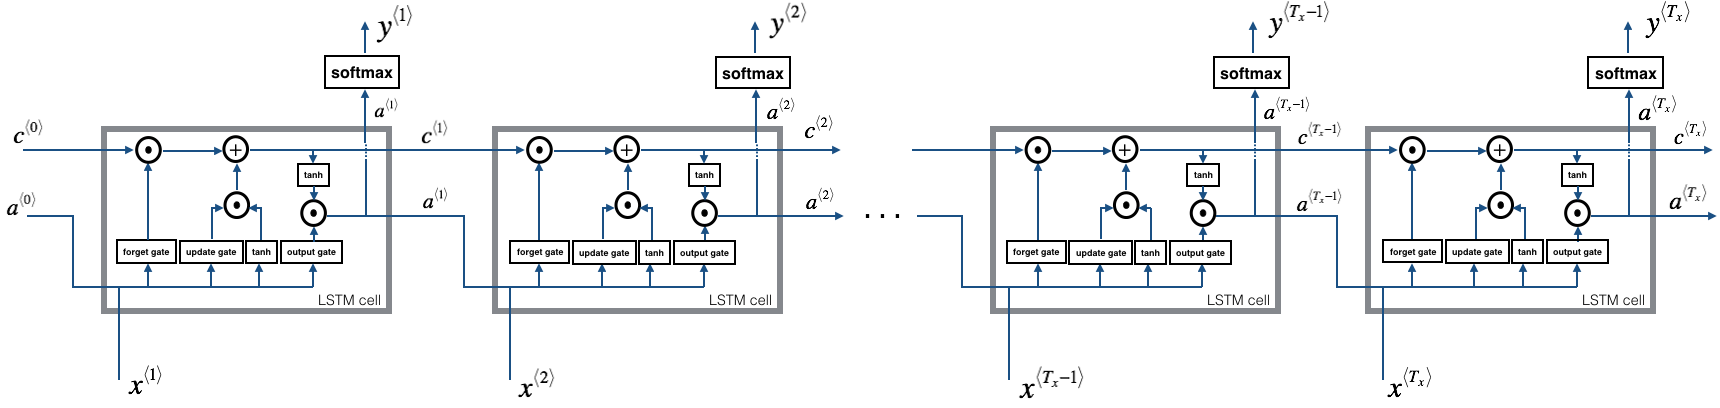

In [16]:
# @title
from IPython.display import Image, display

# Display the image
display(Image(filename= image_path +'LSTM_rnn.png'))

# Display caption
from IPython.display import HTML
display(HTML("<p style='text-align:center;color:purple;font-weight:bold;'>LSTM over multiple time steps.</p>"))


In [17]:
def lstm_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network using an LSTM-cell.

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc -- Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo -- Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    c -- The value of the cell state, numpy array of shape (n_a, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of all the caches, x)
    """

    # Initialize "caches", which will track the list of all the caches
    caches = []

    Wy = parameters['Wy']
    # Retrieve dimensions from shapes of x and parameters['Wy']
    n_x, m, T_x = x.shape
    n_y, n_a = Wy.shape

    # initialize "a", "c" and "y" with zeros
    a = np.zeros((n_a, m, T_x))
    c = np.zeros((n_a, m, T_x))
    y = np.zeros((n_y, m, T_x))

    # Initialize a_next and c_next
    a_next = a0
    c_next = np.zeros((n_a, m))

    # loop over all time-steps
    for t in range(T_x):
        # Get the 2D slice 'xt' from the 3D input 'x' at time step 't'
        xt = x[:,:,t]
        # Update next hidden state, next memory state, compute the prediction, get the cache
        a_next, c_next, yt, cache = lstm_cell_forward(xt, a_next, c_next, parameters)
        # Save the value of the new "next" hidden state in a
        a[:,:,t] = a_next
        # Save the value of the next cell state
        c[:,:,t]  = c_next
        # Save the value of the prediction in y
        y[:,:,t] = yt
        # Append the cache into caches
        caches.append(cache)

    # store values needed for backward propagation in cache
    caches = (caches, x)

    return a, y, c, caches

In [18]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 7)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Wf'] = np.random.randn(5, 5 + 3)
parameters_tmp['bf'] = np.random.randn(5, 1)
parameters_tmp['Wi'] = np.random.randn(5, 5 + 3)
parameters_tmp['bi']= np.random.randn(5, 1)
parameters_tmp['Wo'] = np.random.randn(5, 5 + 3)
parameters_tmp['bo'] = np.random.randn(5, 1)
parameters_tmp['Wc'] = np.random.randn(5, 5 + 3)
parameters_tmp['bc'] = np.random.randn(5, 1)
parameters_tmp['Wy'] = np.random.randn(2, 5)
parameters_tmp['by'] = np.random.randn(2, 1)

a_tmp, y_tmp, c_tmp, caches_tmp = lstm_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][3][6] = ", a_tmp[4][3][6])
print("a.shape = ", a_tmp.shape)
print("y[1][4][3] =", y_tmp[1][4][3])
print("y.shape = ", y_tmp.shape)



a[4][3][6] =  0.1721177675329167
a.shape =  (5, 10, 7)
y[1][4][3] = 0.9508734618501101
y.shape =  (2, 10, 7)


In [19]:
print(np.sum(y_tmp[:,1,1]))

1.0


# <font color='blue'>**Gated Curren Unit (GRU)**</font>

- GRUs are simplified versioin of LSTM

- Two gates: **Reset gate** and **Update gate**

- Combining the forget and input gates into a single Update gate

- Update Gate: Controls how much of the current input to use to update the hidden state.

- Reset Gate: Controls how much of the previous hidden state to forget

- cell state $\mathbf{c}^{\langle t \rangle}$ is equal to hidden state $\mathbf{a}^{\langle t \rangle}$.

$$\mathbf{\tilde{c}}^{\langle t \rangle} = \tanh\left( \mathbf{W}_{c} [\mathbf{\Gamma}_r^{\langle t \rangle} * \mathbf{c}^{\langle t - 1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{c} \right)$$

$$\mathbf{\Gamma}_r^{\langle t \rangle} = \sigma\left(\mathbf{W}_r[c^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_r \right) $$



$$\mathbf{\Gamma}_u^{\langle t \rangle} = \sigma \left(\mathbf{W}_u[c^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_u \right) $$

$$\mathbf{c}^{\langle t \rangle} = \mathbf{\Gamma}_u * \mathbf{\tilde{c}}^{\langle t \rangle} + (1 - \mathbf{\Gamma}_u) * \mathbf{c}^{\langle t-1 \rangle}$$


### <font color='blue'>**Equation comparision**</font>

| <font color='green'>LSTM</font>               | <font color='green'>GRU</font>                             |
|-----------------------|----------------------------------|
|  $$\mathbf{\tilde{c}}^{\langle t \rangle} = \tanh\left( \mathbf{W}_{c} [\mathbf{a}^{\langle t - 1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{c} \right) $$  | $$\mathbf{\tilde{c}}^{\langle t \rangle} = \tanh\left( \mathbf{W}_{c} [\mathbf{\Gamma}_r^{\langle t \rangle} * \mathbf{c}^{\langle t - 1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{c} \right)$$  | 
| $$\mathbf{\Gamma}_f^{\langle t \rangle} = \sigma(\mathbf{W}_f[\mathbf{a}^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_f) $$           | $$\mathbf{\Gamma}_r^{\langle t \rangle} = \sigma\left(\mathbf{W}_r[c^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_r \right) $$ | 
| $$\mathbf{\Gamma}_u^{\langle t \rangle} = \sigma(\mathbf{W}_u[a^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_u) $$        |$$\mathbf{\Gamma}_u^{\langle t \rangle} = \sigma \left(\mathbf{W}_u[c^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_u \right) $$   |
| $$ \mathbf{\Gamma}_o^{\langle t \rangle}=  \sigma(\mathbf{W}_o[\mathbf{a}^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{o})$$  | $$ NONE   $$          |  
| $$ \mathbf{c}^{\langle t \rangle} = \mathbf{\Gamma}_{i}^{\langle t \rangle} *\mathbf{\tilde{c}}^{\langle t \rangle} + \mathbf{\Gamma}_f^{\langle t \rangle}* \mathbf{c}^{\langle t-1 \rangle} $$     | $$\mathbf{c}^{\langle t \rangle} = \mathbf{\Gamma}_u * \mathbf{\tilde{c}}^{\langle t \rangle} + (1 - \mathbf{\Gamma}_u) * \mathbf{c}^{\langle t-1 \rangle}$$               | 
| $$ \mathbf{a}^{\langle t \rangle} = \mathbf{\Gamma}_o^{\langle t \rangle} * \tanh(\mathbf{c}^{\langle t \rangle}) $$ | $$\mathbf{a}^{\langle t \rangle} = \mathbf{c}^{\langle t \rangle}$$      |


### <font color='blue'>**Summary of Key Differences**</font>

| <font color='green'>Features</font>               | <font color='green'>LSTM</font>                             | <font color='green'>GRU</font>                              |
|-----------------------|----------------------------------|----------------------------------|
| <font color='grey'>**Architecture**</font> | 3 gates (input, forget, output)  | 2 gates (reset, update)          |
| <font color='grey'>**States**</font>             | 2 states (cell state, hidden state) | 1 state (hidden state only)      |
| <font color='grey'>**Complexity**</font>         | More complex (more parameters)   | Simpler (fewer parameters)       |
| <font color='grey'>**Training Speed**</font>     | Slower to train                 | Faster to train                  |
| <font color='grey'>**Memory Efficiency**</font>  | Higher memory usage             | More memory-efficient            |
| <font color='grey'>**Long-Term Dependencies**</font> | Better for long sequences      | Good for moderate sequences      |
| <font color='grey'>**Use Cases**</font>          | Longer sequence tasks           | More computationally efficient tasks |
